In [1]:
import numpy as np
import pandas as pd

In [5]:
CCTV_Incheon = pd.read_csv('data/CCTV_in_Inchon.csv', encoding = 'cp949')
CCTV_Incheon.head()

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
0,인천교통공사 계양역,인천광역시 계양구 다남로 24,인천광역시 계양구 귤현동 451-8,다목적,19,41,역사 내,7,1999-10,032-710-9105,37.571539,126.736319,2019-04-30
1,인천교통공사 귤현역,인천광역시 계양구 장제로 1136,인천광역시 계양구 귤현동 357-2,다목적,19,41,역사 내,7,1999-10,032-515-9104,37.566362,126.742498,2019-04-30
2,인천교통공사 박촌역,인천광역시 계양구 장제로 992,인천광역시 계양구 박촌동 18-2,다목적,25,41,역사 내,7,1999-10,032-519-3122,37.553525,126.744946,2019-04-30
3,인천교통공사 임학역,인천광역시 계양구 장제로 875,인천광역시 계양구 임학동 93,다목적,15,41,역사 내,7,1999-10,032-541-3113,37.545058,126.738642,2019-04-30
4,인천교통공사 계산역,인천광역시 계양구 경명대로 1089,인천광역시 계양구 계산동 1014,다목적,26,41,역사 내,7,1999-10,032-546-3151,37.543243,126.728436,2019-04-30


In [6]:
CCTV_Incheon.shape

(56, 13)

In [7]:
CCTV_Incheon.columns

Index(['관리기관명', '소재지도로명주소', '소재지지번주소', '설치목적구분', '카메라대수', '카메라화소수', '촬영방면정보',
       '보관일수', '설치년월', '관리기관전화번호', '위도', '경도', '데이터기준일자'],
      dtype='object')

In [10]:
CCTV_Incheon.drop(columns = ['관리기관명', '소재지지번주소', '설치목적구분', '카메라화소수', '촬영방면정보',
       '보관일수', '설치년월', '관리기관전화번호', '위도', '경도', '데이터기준일자'], inplace = True)

In [11]:
CCTV_Incheon.head()

,소재지도로명주소,카메라대수
0,인천광역시 계양구 다남로 24,19
1,인천광역시 계양구 장제로 1136,19
2,인천광역시 계양구 장제로 992,25
3,인천광역시 계양구 장제로 875,15
4,인천광역시 계양구 경명대로 1089,26


In [14]:
CCTV_Incheon.columns = ['주소','CCTV']
CCTV_Incheon.head()

,주소,CCTV
0,인천광역시 계양구 다남로 24,19
1,인천광역시 계양구 장제로 1136,19
2,인천광역시 계양구 장제로 992,25
3,인천광역시 계양구 장제로 875,15
4,인천광역시 계양구 경명대로 1089,26


# 주소 컬럼값 구만 남기고 변경하기

In [15]:
jusoS = pd.Series(CCTV_Incheon['주소'])
jusoS.head()

0       인천광역시 계양구 다남로 24
1     인천광역시 계양구 장제로 1136
2      인천광역시 계양구 장제로 992
3      인천광역시 계양구 장제로 875
4    인천광역시 계양구 경명대로 1089
Name: 주소, dtype: object

In [16]:
inCheonGu = ['계양구','부평구','연수구','서구','미추홀구','남동구']
for i in range(0,len(inCheonGu)):
    for j in range(0,len(jusoS)):
        if inCheonGu[i] in jusoS[j]:
            jusoS[j] = inCheonGu[i]

In [17]:
jusoS.head()

0    계양구
1    계양구
2    계양구
3    계양구
4    계양구
Name: 주소, dtype: object

In [18]:
CCTV_Incheon['주소'] = jusoS

In [19]:
CCTV_Incheon.head()

,주소,CCTV
0,계양구,19
1,계양구,19
2,계양구,25
3,계양구,15
4,계양구,26


In [20]:
CCTV_Incheon.groupby(['주소']).sum()

,CCTV
주소,
계양구,147
남동구,278
미추홀구,121
부평구,143
서구,516
연수구,339


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\gulim.ttc'
font_name = fm.FontProperties(fname = path).get_name()
print(font_name)
plt.rc('font', family=font_name)


Gulim


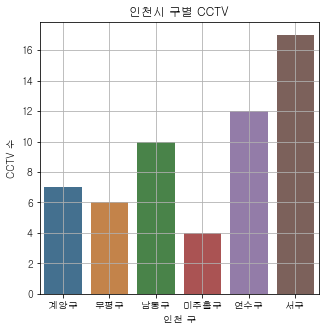

In [23]:
ax = plt.subplots(figsize = (5, 5))
ax = sns.countplot(x = '주소', data = CCTV_Incheon, saturation = 0.5)
ax.set_title('인천시 구별 CCTV')
ax.set_xlabel('인천 구')
ax.set_ylabel('CCTV 수')
plt.grid()
plt.show()

In [30]:
pop_incheon = pd.read_csv('data/population_in_Inchon.csv', encoding = 'cp949')
pop_incheon.head()

,군 구,주 민 등 록 인 구(남),주 민 등 록 인 구(여),주 민 등 록 인 구(세대수),외 국 인(남),외 국 인(여)
0,중 구,62202,57227,55952,2006,1886
1,동 구,33875,33312,29153,518,391
2,남 구,211021,207512,183418,4281,4235
3,연수구,169121,170806,126408,4386,4862
4,남동구,268451,270525,217621,8370,3824


In [32]:
pop_incheon.columns

Index(['군  구', '주 민 등 록 인 구(남)', '주 민 등 록 인 구(여)', '주 민 등 록 인 구(세대수)',
       '외 국 인(남)', '외 국 인(여)'],
      dtype='object')

In [36]:
pop_incheon.drop(columns = ['주 민 등 록 인 구(세대수)'], inplace = True)

In [37]:
pop_incheon.head()

,군 구,주 민 등 록 인 구(남),주 민 등 록 인 구(여),외 국 인(남),외 국 인(여)
0,중 구,62202,57227,2006,1886
1,동 구,33875,33312,518,391
2,남 구,211021,207512,4281,4235
3,연수구,169121,170806,4386,4862
4,남동구,268451,270525,8370,3824


In [41]:
pop_incheon['총인구'] = (pop_incheon['주 민 등 록 인 구(남)'] + pop_incheon['주 민 등 록 인 구(여)']
                        + pop_incheon['외 국 인(남)'] + pop_incheon['외 국 인(여)'])

In [42]:
pop_incheon.head()

,군 구,주 민 등 록 인 구(남),주 민 등 록 인 구(여),외 국 인(남),외 국 인(여),총인구
0,중 구,62202,57227,2006,1886,123321
1,동 구,33875,33312,518,391,68096
2,남 구,211021,207512,4281,4235,427049
3,연수구,169121,170806,4386,4862,349175
4,남동구,268451,270525,8370,3824,551170


In [49]:
pop_incheon['외국인비율'] = (pop_incheon['외 국 인(남)'] + pop_incheon['외 국 인(여)']) / pop_incheon['총인구'] * 100

In [50]:
pop_incheon.head()

,주 민 등 록 인 구(남),주 민 등 록 인 구(여),외 국 인(남),외 국 인(여),총인구,외국인비율
구별,,,,,,
중 구,62202,57227,2006,1886,123321,3.155991
동 구,33875,33312,518,391,68096,1.334880
남 구,211021,207512,4281,4235,427049,1.994151
연수구,169121,170806,4386,4862,349175,2.648529
남동구,268451,270525,8370,3824,551170,2.212385


In [51]:
pop_incheon.rename(columns = {pop_incheon.columns[0] : '구별' }, inplace= True)
pop_incheon.head()

,구별,주 민 등 록 인 구(여),외 국 인(남),외 국 인(여),총인구,외국인비율
구별,,,,,,
중 구,62202,57227,2006,1886,123321,3.155991
동 구,33875,33312,518,391,68096,1.334880
남 구,211021,207512,4281,4235,427049,1.994151
연수구,169121,170806,4386,4862,349175,2.648529
남동구,268451,270525,8370,3824,551170,2.212385


In [52]:
pop_incheon.set_index('구별',inplace = True)
pop_incheon.head(3)

,주 민 등 록 인 구(여),외 국 인(남),외 국 인(여),총인구,외국인비율
구별,,,,,
62202,57227,2006,1886,123321,3.155991
33875,33312,518,391,68096,1.334880
211021,207512,4281,4235,427049,1.994151


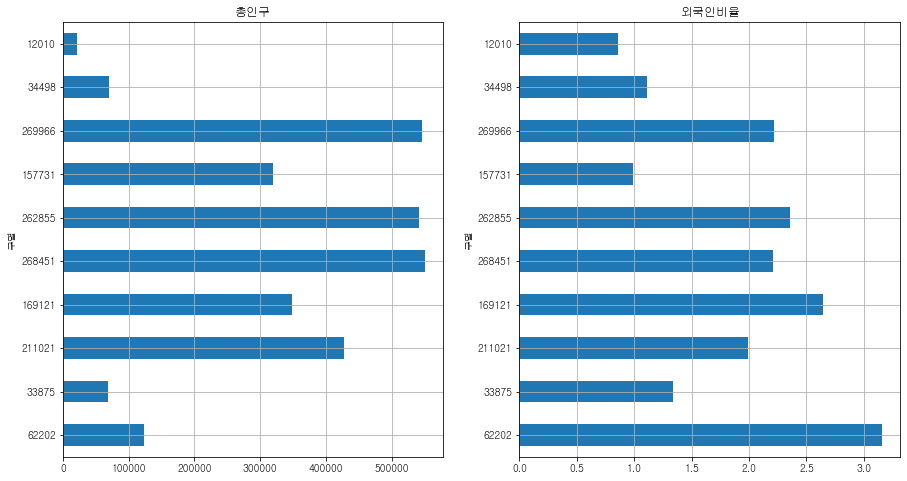

In [60]:
plt.figure(figsize = (15,8))
plt.subplot(121)
pop_incheon['총인구'].plot(kind='barh', grid = True)
plt.title('총인구')
plt.subplot(122)
pop_incheon['외국인비율'].plot(kind='barh', grid = True)
plt.title('외국인비율')
plt.show()